## **Exploratory Data Analysis**

## **1.0 Import Libraries**

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, shapiro,levene, mannwhitneyu, ks_2samp

## **2.0 Load Dataset**

In [50]:
df=pd.read_csv('../Artifacts/train.csv')

## **3.0 Data Exploration**

In [51]:
## Sneak peak of the data
df.head()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0

In [52]:
## Shape of Dataset
print(f"Dataset have {df.shape[0]} rows and {df.shape[1]} Columns.")

Dataset have 2190 rows and 13 Columns.


In [53]:
## Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [54]:
# Statistical Summary
df.describe()

id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.948402  1013.602146    26.365799    23.953059   
std     632.342866   105.203592     5.655366     5.654330     5.222410   
min       0.000000     1.000000   999.000000    10.400000     7.400000   
25%     547.250000    89.000000  1008.600000    21.300000    19.300000   
50%    1094.500000   178.500000  1013.000000    27.800000    25.500000   
75%    1641.750000   270.000000  1017.775000    31.200000    28.400000   
max    2189.000000   365.000000  1034.600000    36.000000    31.500000   

           mintemp     dewpoint     humidity        cloud     sunshine  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean     22.170091    20.454566    82.036530    75.721918     3.744429   
std       5.059120     5.288406     7.800654    18.026498     3.626327   
min       4.000000    -0.300000    39.000000     2.000000     0.000000   
25%      17.700000    16.800000    77.000000    69.000000     0.400000   
50%      23.850000    22.150000    82.000000    83.000000     2.400000   
75%      26.400000    25.000000    88.000000    88.000000     6.800000   
max      29.800000    26.700000    98.000000   100.000000    12.100000   

       winddirection    windspeed     rainfall  
count    2190.000000  2190.000000  2190.000000  
mean      104.863151    21.804703     0.753425  
std        80.002416     9.898659     0.431116  
min        10.000000     4.400000     0.000000  
25%        40.000000    14.125000     1.000000  
50%        70.000000    20.500000     1.000000  
75%       200.000000    27.900000     1.000000  
max       300.000000    59.500000     1.000000

In [55]:
## Missing Values
df.isna().sum().sort_values(ascending=False)

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [56]:
## Checkig if duplicate
df.duplicated().sum()

0

**Observation Set:**

- `id` column needs to be dropped as it is irrelavent to the model.
- No null or Duplicated value found🥳
- No Inconsistency in data found.

## **4.0 Exploratory Data Analysis**

In [60]:
target="rainfall"
labels=df.drop("rainfall",axis=1).columns

In [61]:
labels

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [24]:
def eda_wrt_rainfall(feature_name, y_var=df["rainfall"]):
    fig,ax=plt.subplots(2,2,figsize=(16,8))
    fig.suptitle(f"{feature_name}", fontsize=20, fontweight='bold')
    # kdeplot of variables
    sns.histplot(ax=ax[0,0], x=df[feature_name],hue=y_var, kde=True, palette='Set1')
    ax[0,0].set_title("KdePlot")
    # Boxplot of variables
    sns.boxplot(ax=ax[0,1],x=df[feature_name], hue=y_var, palette='Set1')
    ax[0,1].set_title("BoxPlot")
    # violinplot
    sns.violinplot(ax=ax[1,0], x=df[feature_name], hue=y_var, palette='Set1')
    ax[1,0].set_title("ViolinPlot")

    # Tight Layout
    plt.tight_layout()
    plt.show()

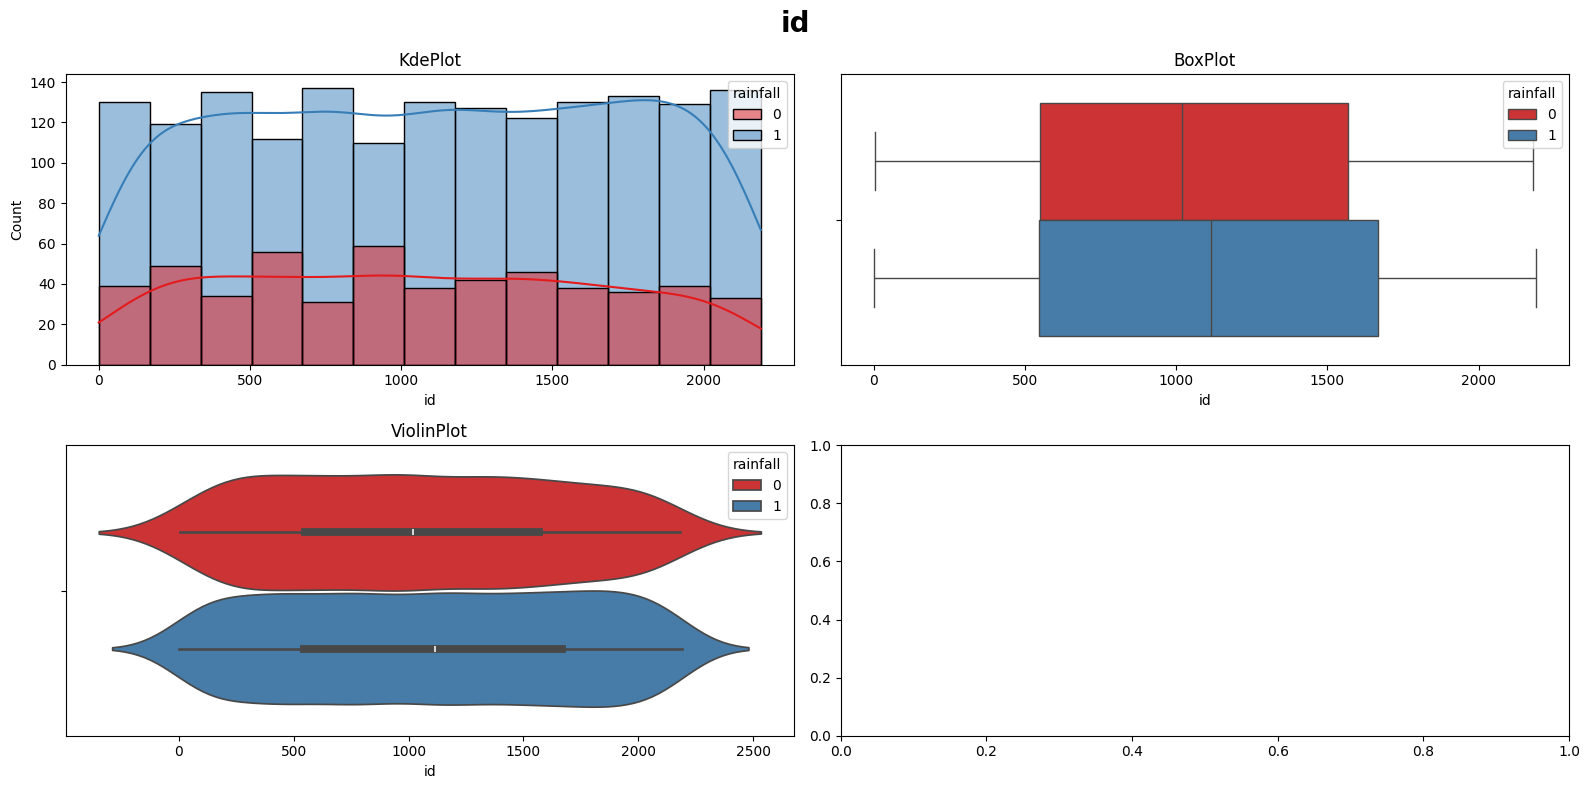

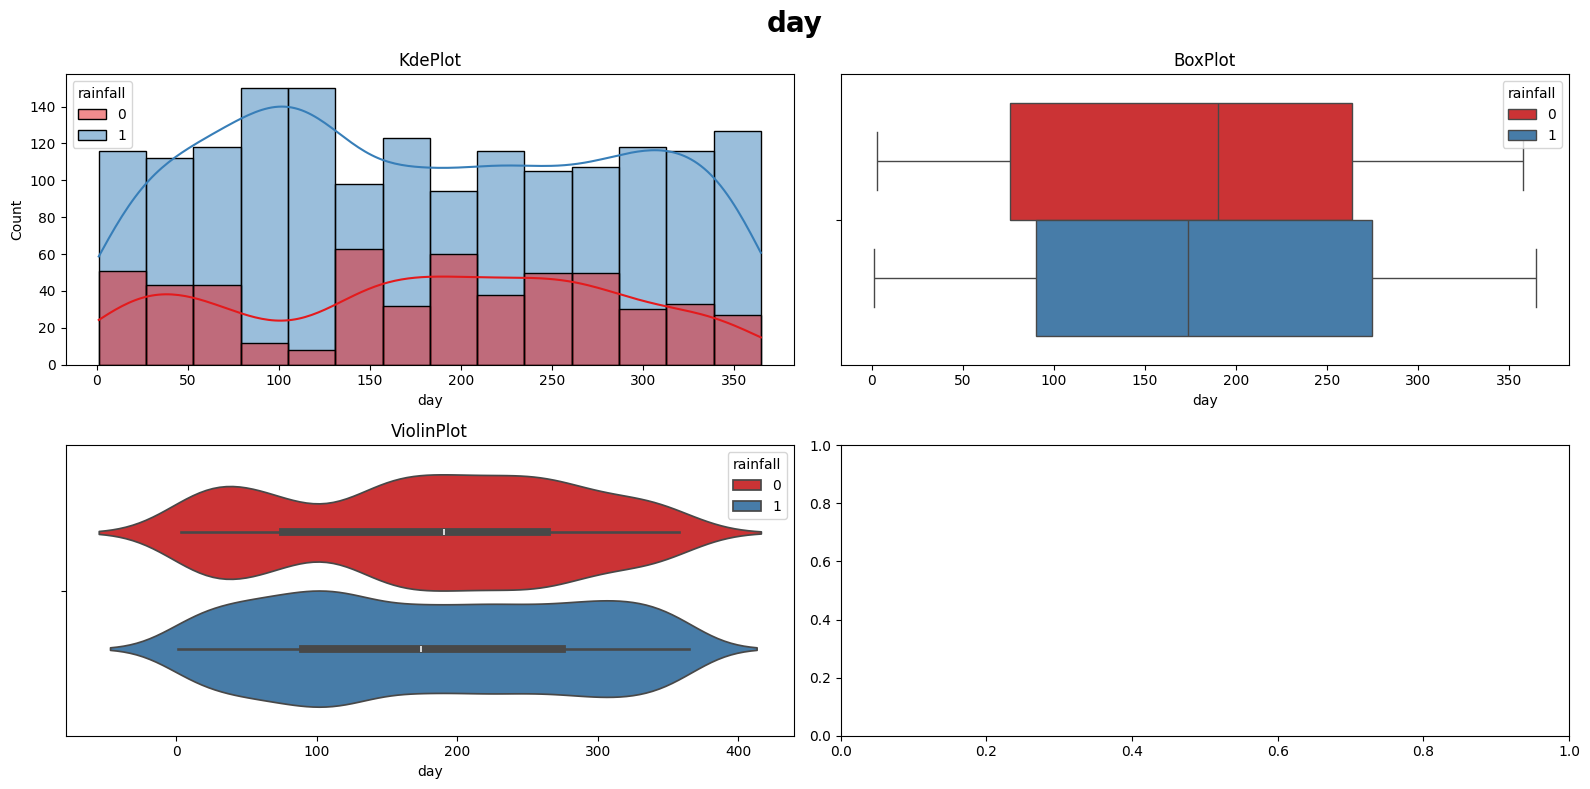

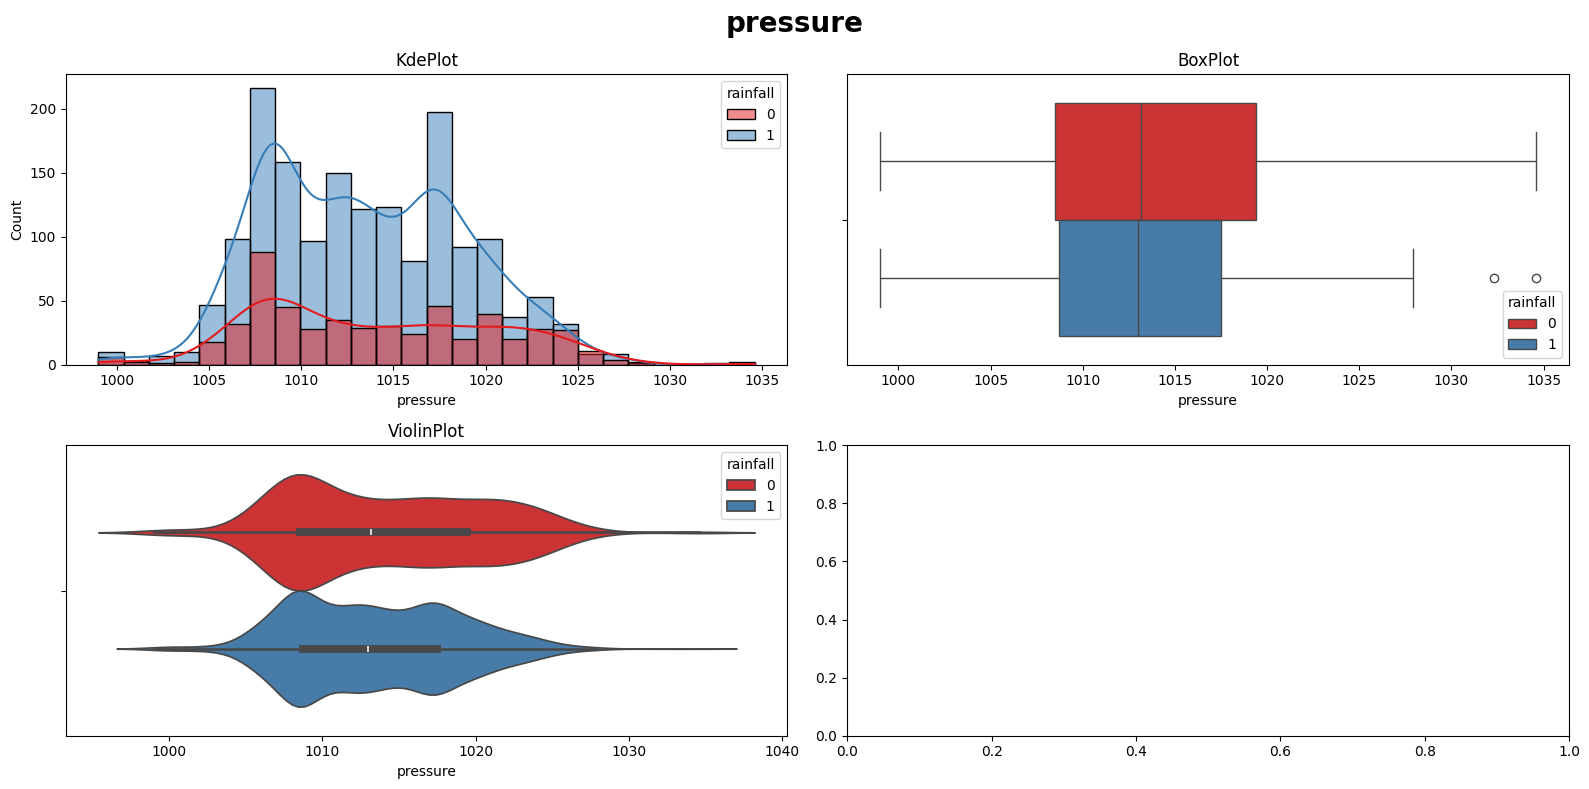

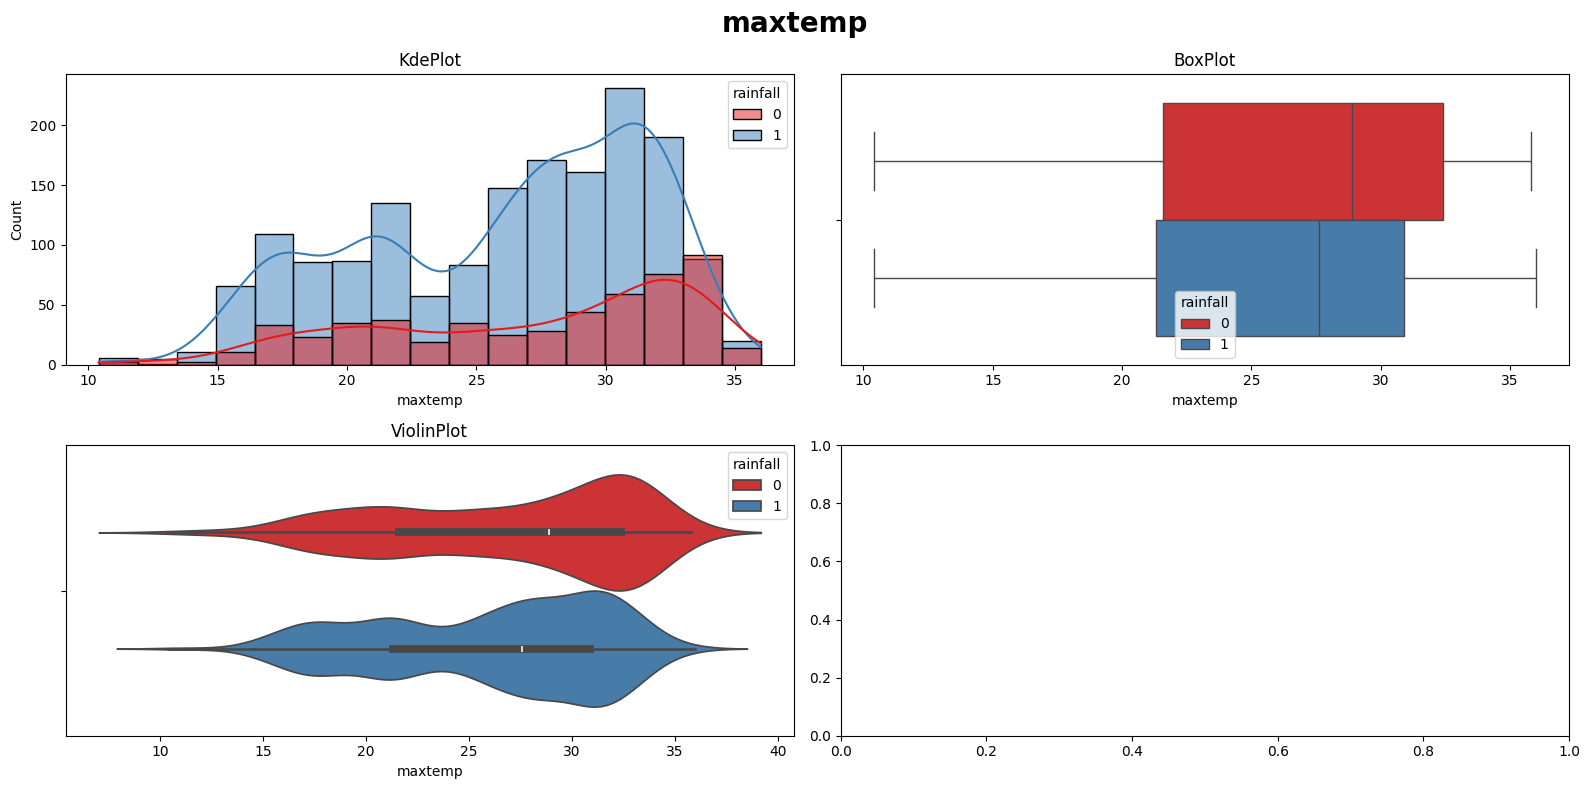

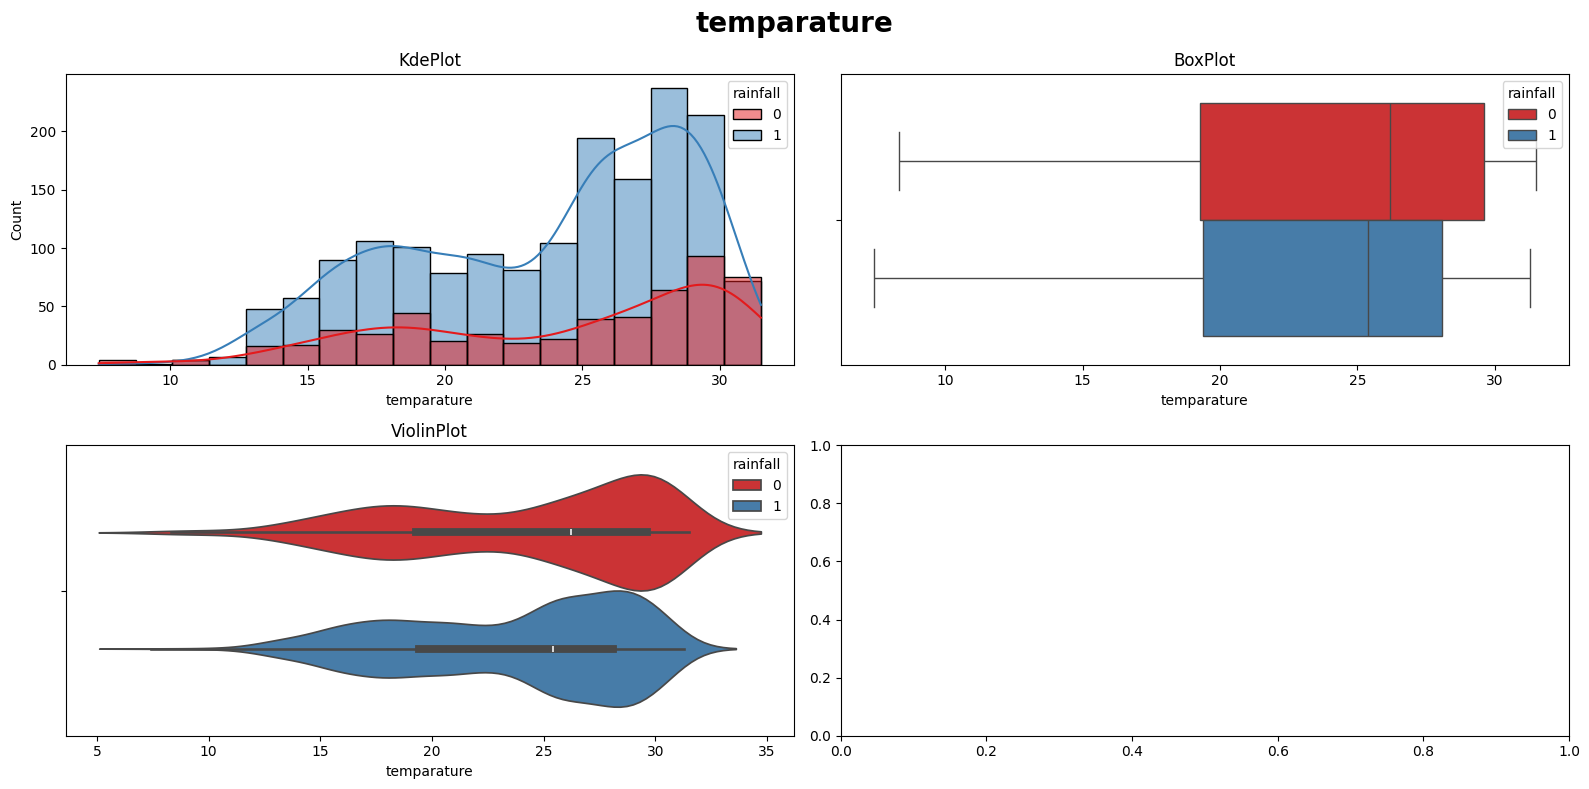

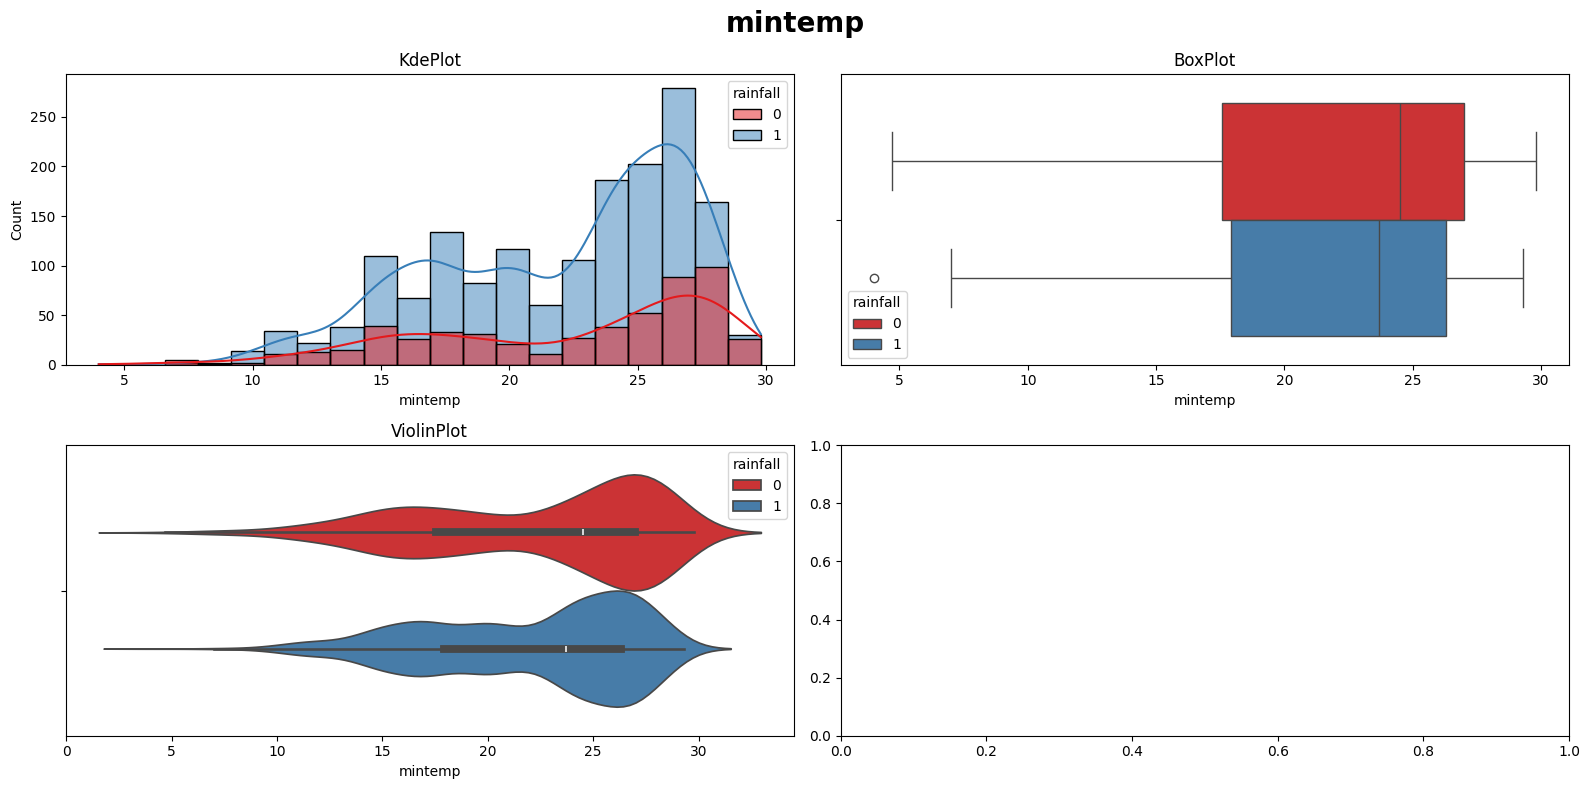

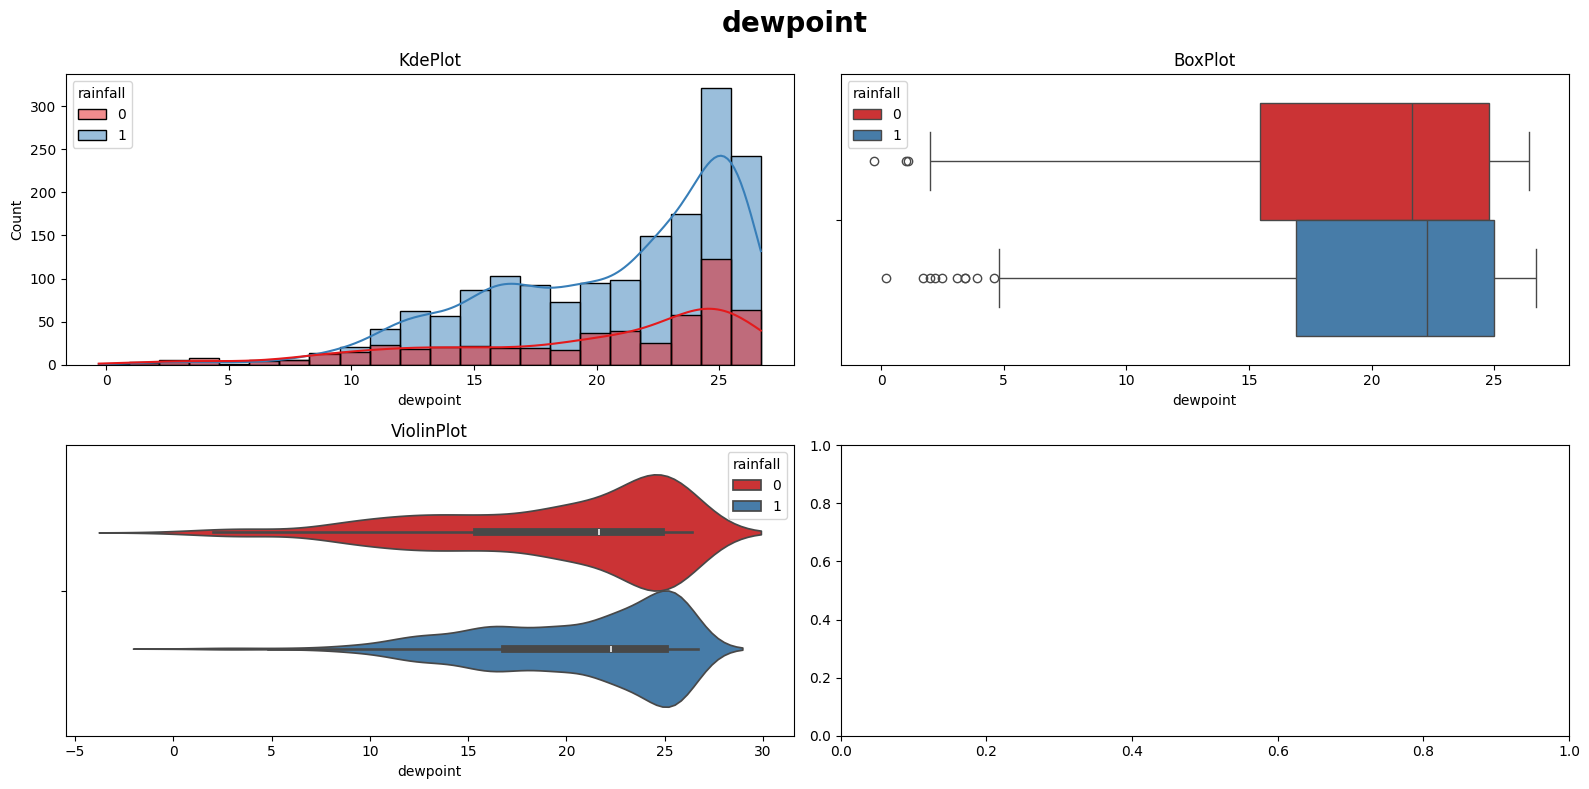

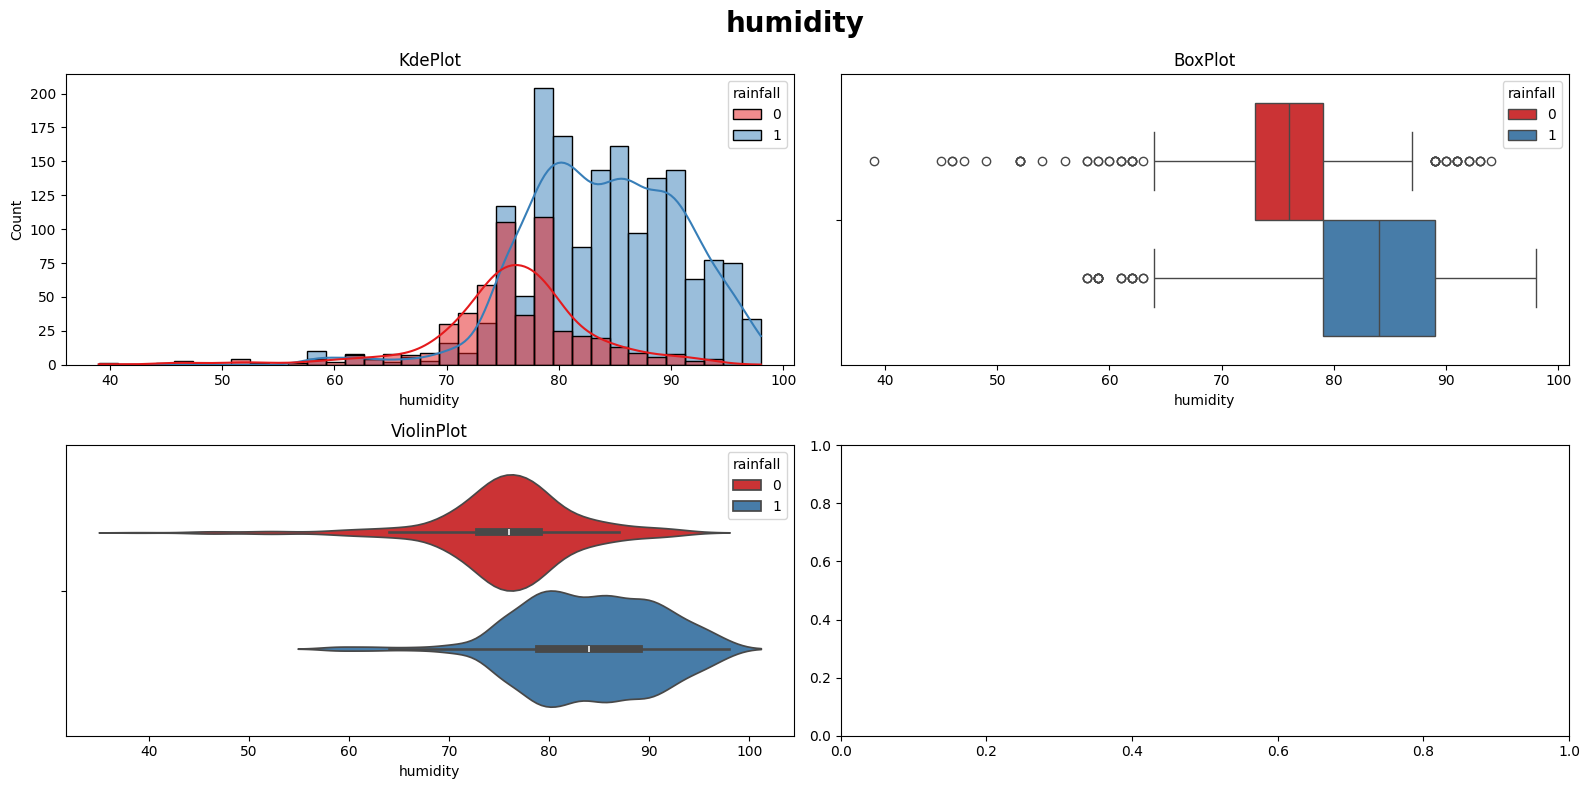

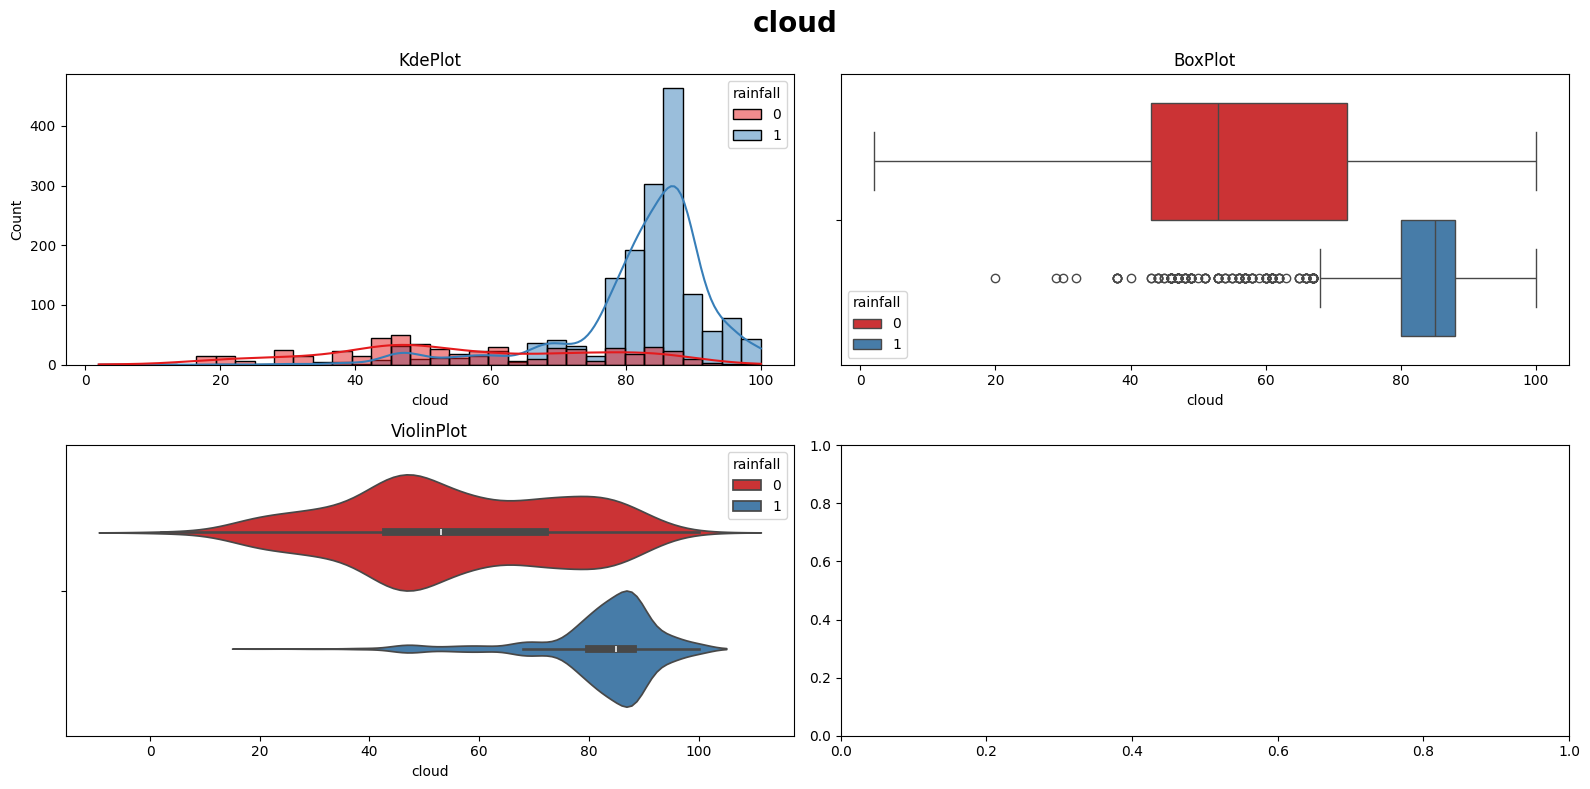

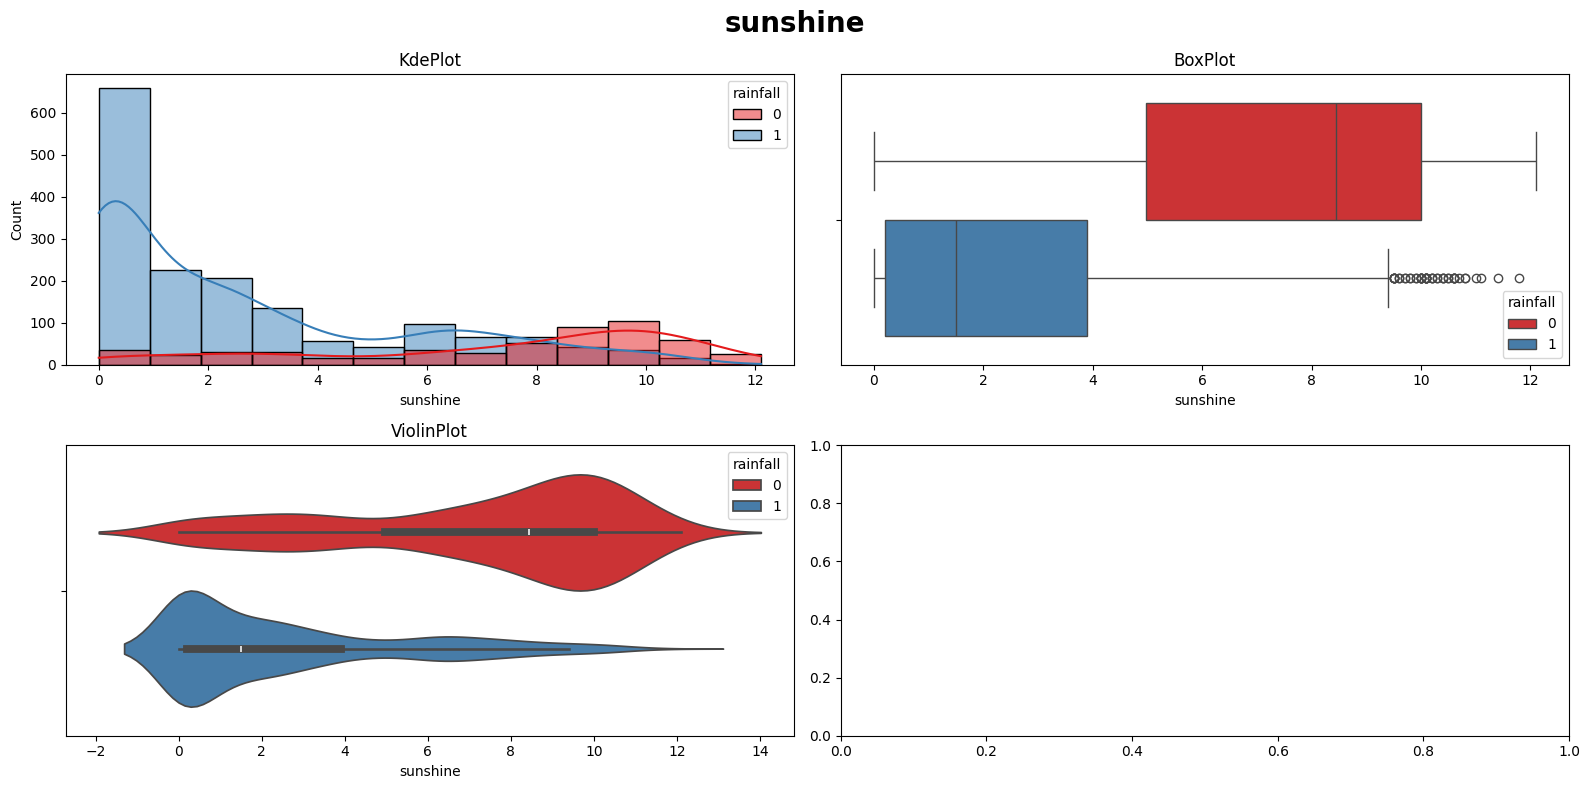

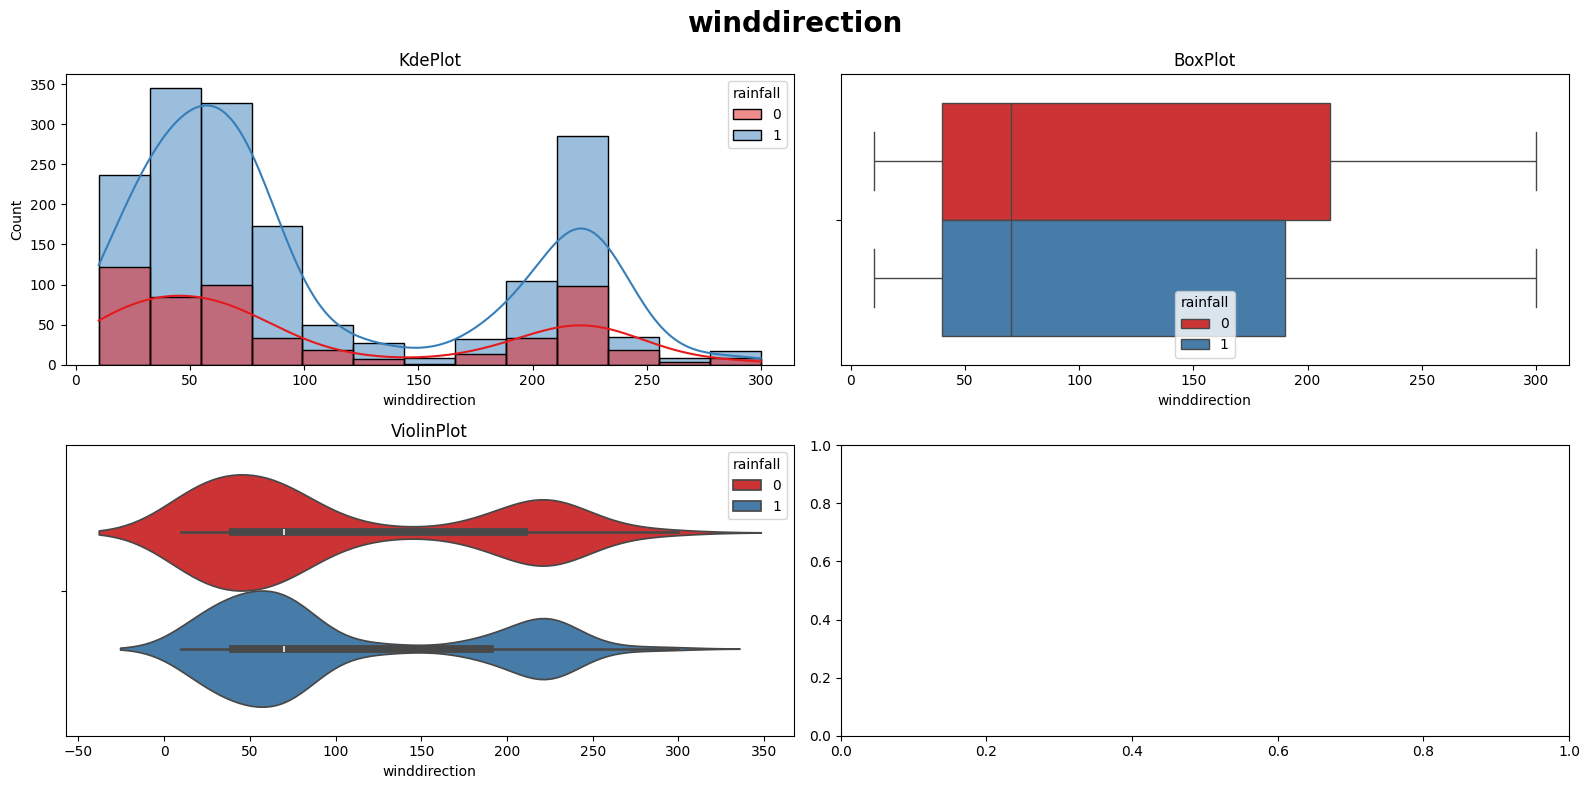

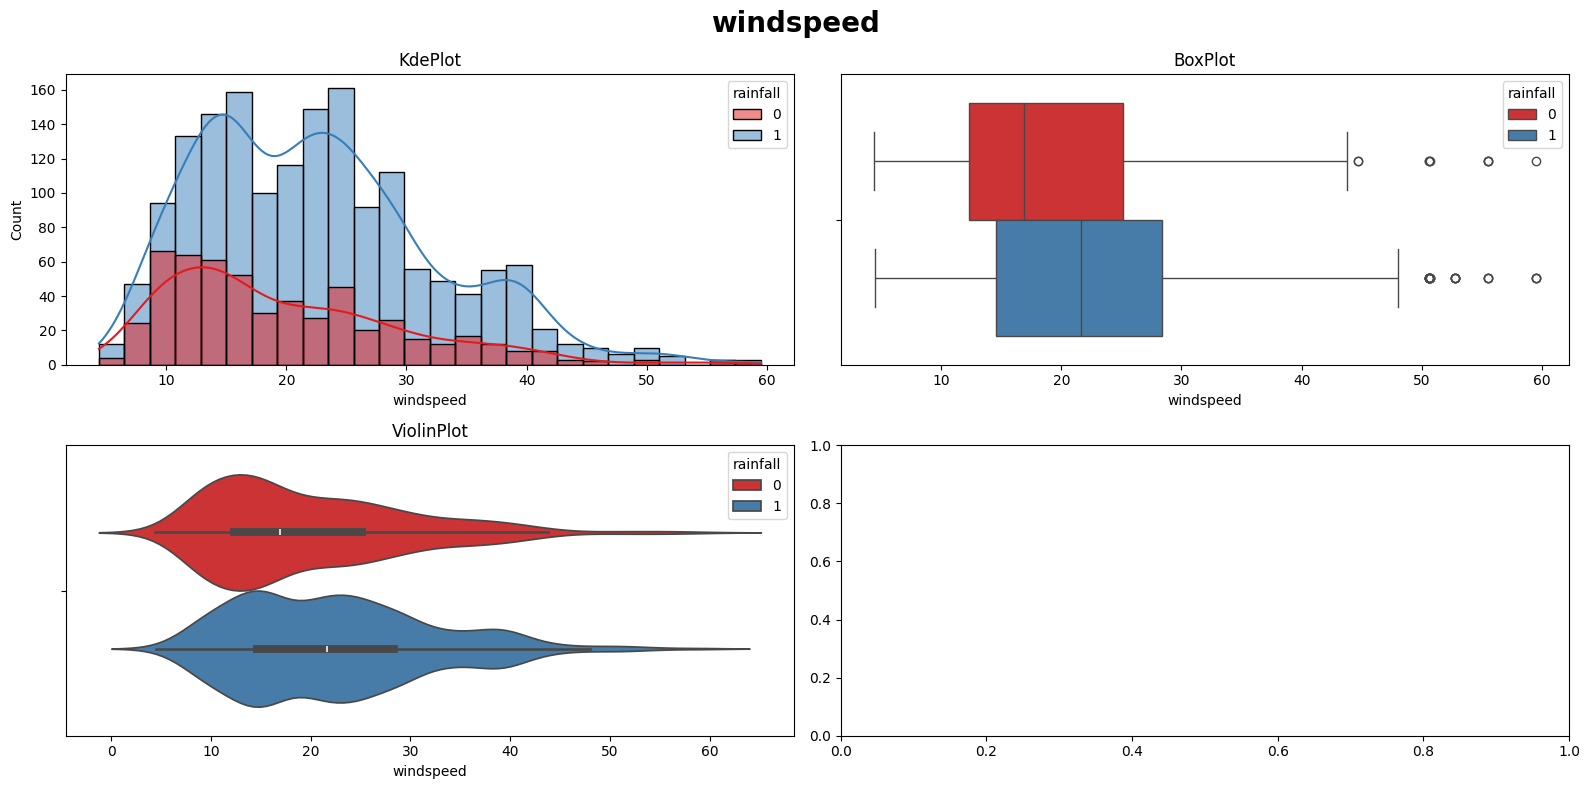

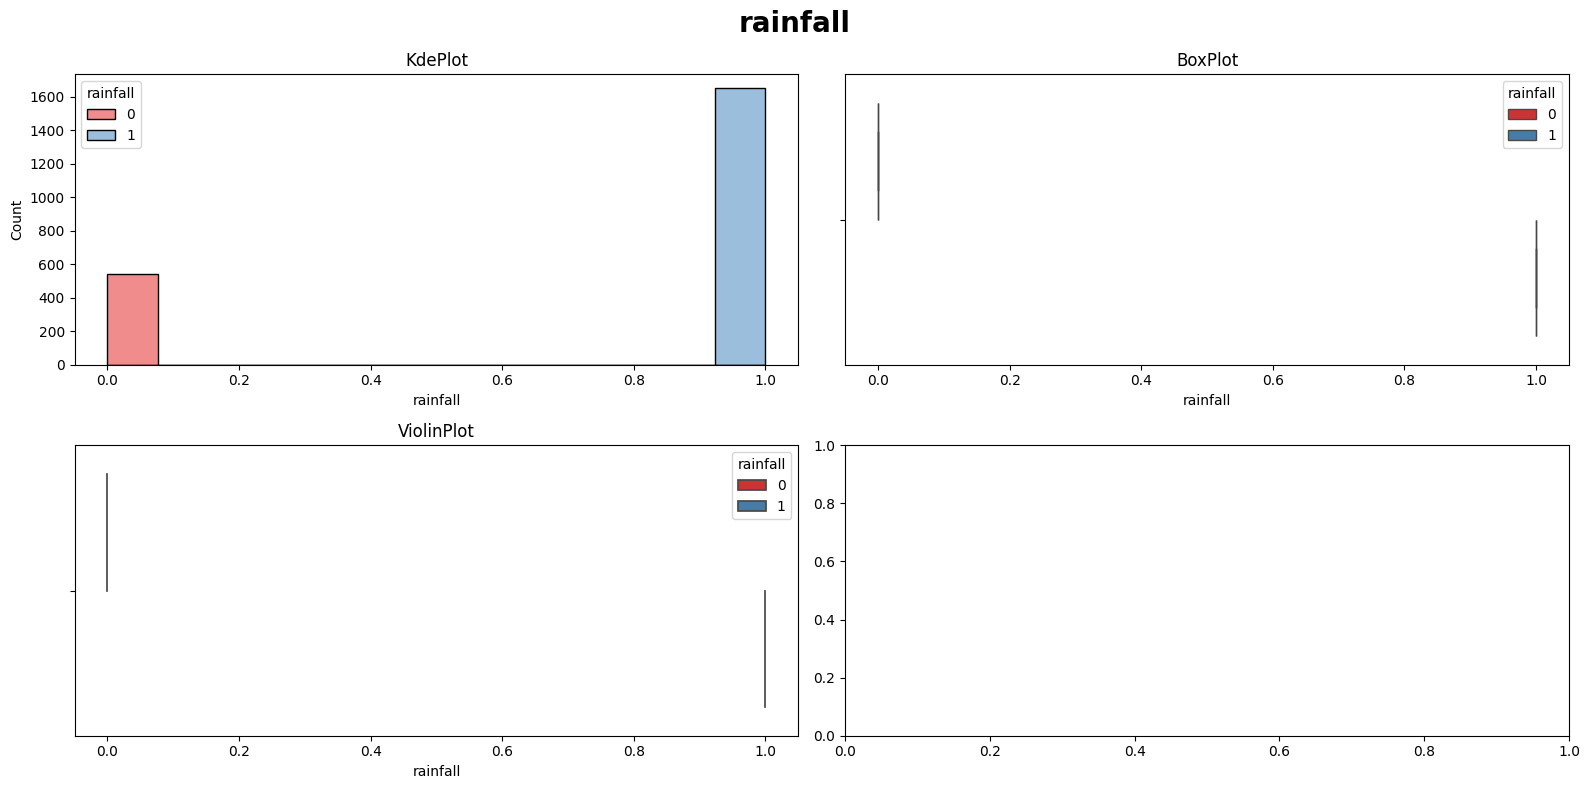

In [25]:
for col in df.columns:
    eda_wrt_rainfall(col)

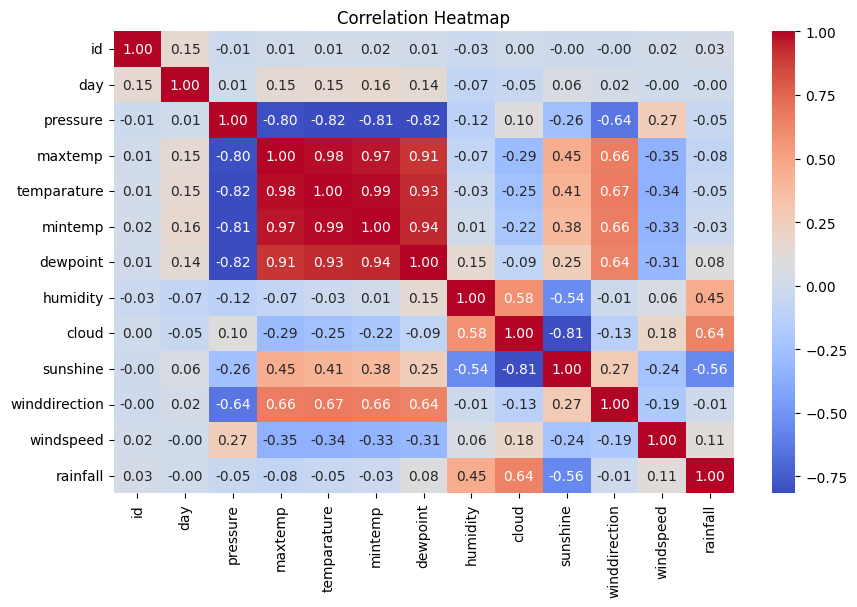

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

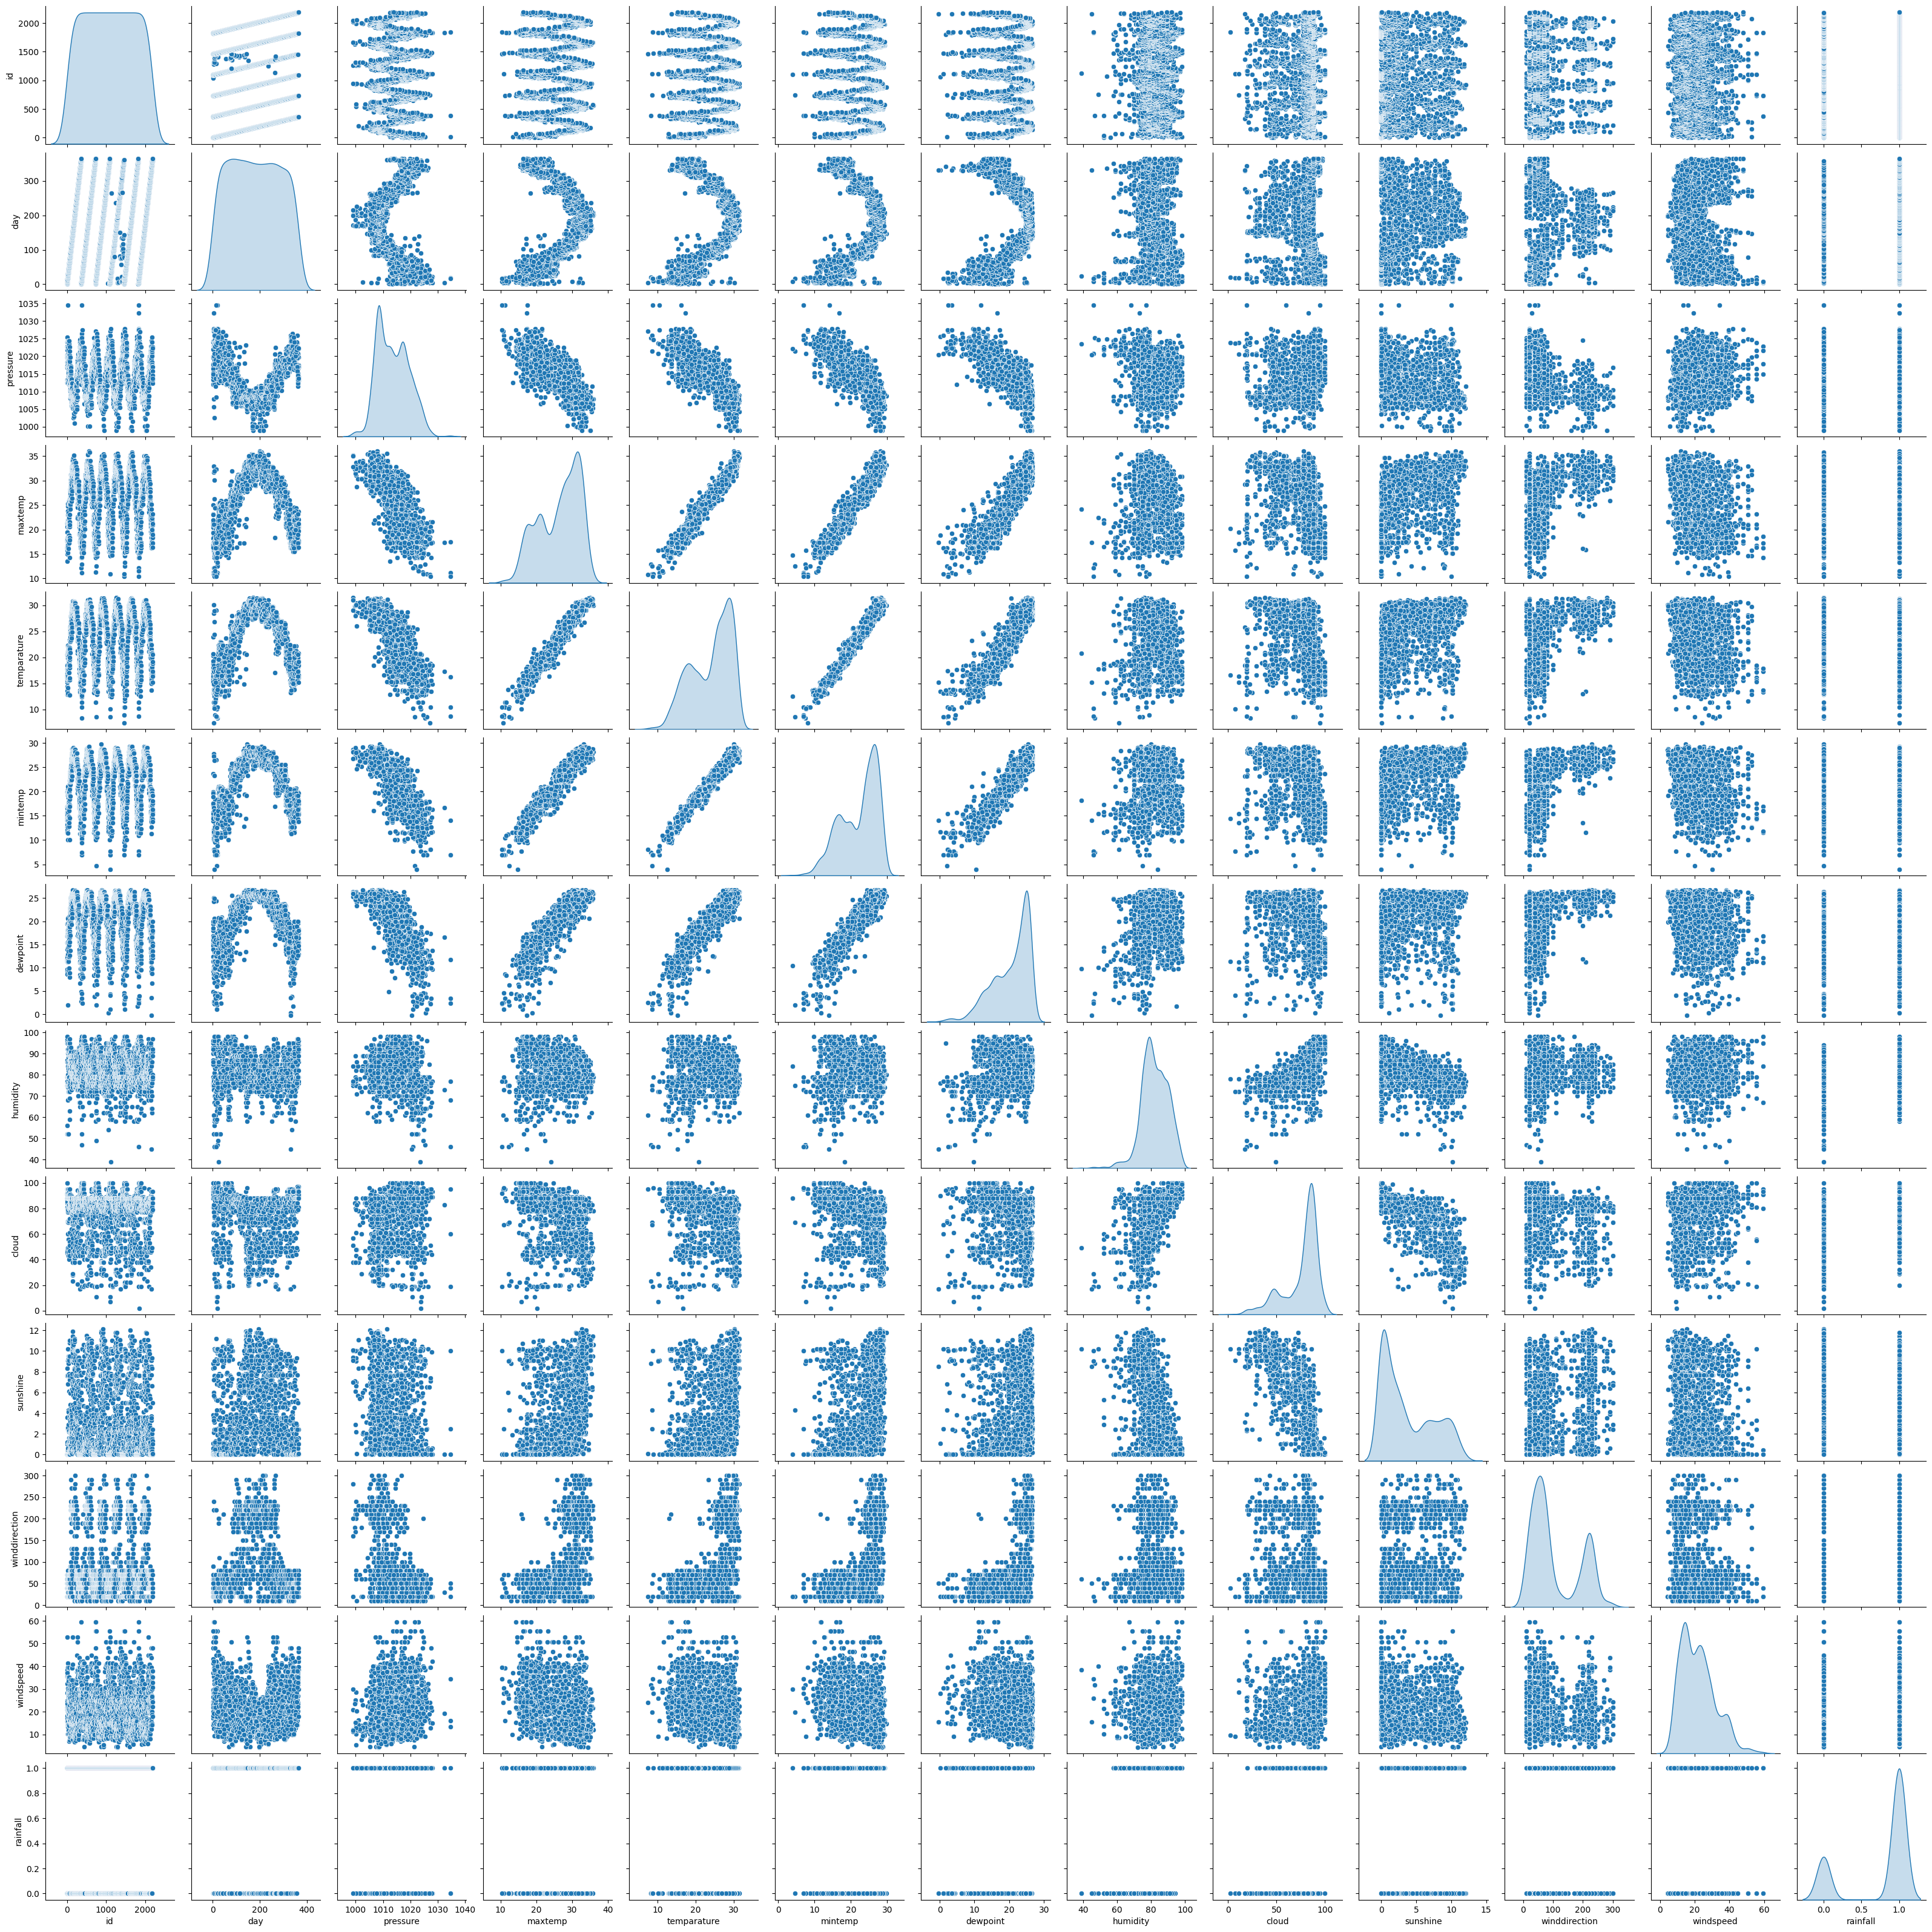

In [27]:
sns.pairplot(df, diag_kind="kde")
plt.show()

In [28]:
for col in df.columns:
    print(f"{col} - Skewness: {skew(df[col])}, Kurtosis: {kurtosis(df[col])}")

id - Skewness: 0.0, Kurtosis: -1.2000005004066847
day - Skewness: 0.03059407109510931, Kurtosis: -1.1930217825745957
pressure - Skewness: 0.2838676961347058, Kurtosis: -0.5045896560454093
maxtemp - Skewness: -0.49055397304529597, Kurtosis: -0.9077139102141252
temparature - Skewness: -0.5570891574588644, Kurtosis: -0.835952076390543
mintemp - Skewness: -0.6487338703498172, Kurtosis: -0.6096012324375528
dewpoint - Skewness: -0.9972055525863847, Kurtosis: 0.4145853019674046
humidity - Skewness: -0.5611564031852231, Kurtosis: 1.393207464303642
cloud - Skewness: -1.3383569809932743, Kurtosis: 1.0487560714050348
sunshine - Skewness: 0.6394330573560584, Kurtosis: -1.0166198131252993
winddirection - Skewness: 0.7075779113773537, Kurtosis: -1.0721678985855068
windspeed - Skewness: 0.7688625200352511, Kurtosis: 0.2819282148470239
rainfall - Skewness: -1.1759371934028973, Kurtosis: -0.6171717171717161


- **Selecting Necessary Features for Model**

In [29]:
for col in df.drop(columns="rainfall").columns:
    stat, p = shapiro(df[col])
    if p > 0.05:
        print(f"{col}: Likely Normally Distributed (p={p:.5f})")
    else:
        print(f"{col}: Not Normally Distributed (p={p:.5f})")


id: Not Normally Distributed (p=0.00000)
day: Not Normally Distributed (p=0.00000)
pressure: Not Normally Distributed (p=0.00000)
maxtemp: Not Normally Distributed (p=0.00000)
temparature: Not Normally Distributed (p=0.00000)
mintemp: Not Normally Distributed (p=0.00000)
dewpoint: Not Normally Distributed (p=0.00000)
humidity: Not Normally Distributed (p=0.00000)
cloud: Not Normally Distributed (p=0.00000)
sunshine: Not Normally Distributed (p=0.00000)
winddirection: Not Normally Distributed (p=0.00000)
windspeed: Not Normally Distributed (p=0.00000)


In [38]:
for col in df.drop(columns="rainfall").columns:
    groups= [df[col][df["rainfall"]==cat] for cat in df["rainfall"].unique()]
    stat, p = levene(*groups)
    if p > 0.05:
        print(f"{col}: Equal Variance (p={p:.5f})")
    else:
        print(f"{col}: Unequal Variance (p={p:.5f})")

id: Equal Variance (p=0.21449)
day: Unequal Variance (p=0.01746)
pressure: Unequal Variance (p=0.00000)
maxtemp: Unequal Variance (p=0.01577)
temparature: Unequal Variance (p=0.00116)
mintemp: Unequal Variance (p=0.00089)
dewpoint: Unequal Variance (p=0.00000)
humidity: Unequal Variance (p=0.00016)
cloud: Unequal Variance (p=0.00000)
sunshine: Unequal Variance (p=0.00000)
winddirection: Unequal Variance (p=0.00993)
windspeed: Equal Variance (p=0.83255)


As:
- Your target is binary (has two categories).
- Your numeric variables are not normally distributed.
- Your numeric variables have unequal variance (heteroscedasticity).

So, we will be using `Mann-Whitney U Test` to statistically test Significance of the variables.

In [75]:
nosignificat_from_mannwhitney=[]
for col in labels:
    group1=df[df[target]==df[target].unique()[0]][col]
    group2=df[df[target]==df[target].unique()[1]][col]
    stat, p=mannwhitneyu(group1, group2, alternative="two-sided")
    if p <= 0.05:
        print(f"{col}: Significant Feature (Useful for Model)")
    else:
        print(f"{col}: Not Significant (Drop This Feature)")
        nosignificat_from_mannwhitney.append(col)

print("\nUseless Features:", nosignificat_from_mannwhitney)

id: Not Significant (Drop This Feature)
day: Not Significant (Drop This Feature)
pressure: Not Significant (Drop This Feature)
maxtemp: Significant Feature (Useful for Model)
temparature: Significant Feature (Useful for Model)
mintemp: Significant Feature (Useful for Model)
dewpoint: Significant Feature (Useful for Model)
humidity: Significant Feature (Useful for Model)
cloud: Significant Feature (Useful for Model)
sunshine: Significant Feature (Useful for Model)
winddirection: Not Significant (Drop This Feature)
windspeed: Significant Feature (Useful for Model)

Useless Features: ['id', 'day', 'pressure', 'winddirection']


- As Additional Check, We will be performing `KS Test `

In [76]:
nosignificance_from_ks=[]
for col in labels:
    group1 = df[df[target] == df[target].unique()[0]][col]
    group2 = df[df[target] == df[target].unique()[1]][col]
    
    stat, p = ks_2samp(group1, group2)
    
    if p <= 0.05:
        print(f"{col}: Significant Feature (Useful for Model)")
    else:
        print(f"{col}: Not Significant (Drop This Feature)")
        nosignificance_from_ks.append(col)
        
print("\nUseless Features:", nosignificance_from_ks)

id: Not Significant (Drop This Feature)
day: Significant Feature (Useful for Model)
pressure: Significant Feature (Useful for Model)
maxtemp: Significant Feature (Useful for Model)
temparature: Significant Feature (Useful for Model)
mintemp: Significant Feature (Useful for Model)
dewpoint: Significant Feature (Useful for Model)
humidity: Significant Feature (Useful for Model)
cloud: Significant Feature (Useful for Model)
sunshine: Significant Feature (Useful for Model)
winddirection: Significant Feature (Useful for Model)
windspeed: Significant Feature (Useful for Model)

Useless Features: ['id']


In [80]:
clmns_to_rmv=list(list(set(nosignificance_from_ks) & set(nosignificat_from_mannwhitney)))
clmns_to_rmv

['id']

**Observation set**

- From day 75 to 125 chances of happening rain are more.
- Data is not normally distributed. Multiple Columns need to be Normalized.
- As Dataset is skewed plus have outliers, so we will:
    - Log Transform
    - Robust Scale
- No Feature is Homogenius.
- `id` feature is completely useless and is needed to be dropped.